# 📊 Netflix Titles - Exploratory Data Analysis

This notebook explores the cleaned & feature-engineered Netflix dataset to uncover:
- Content type distribution
- Trends over time
- Popular genres
- Duration patterns

We will use:
- **Pandas** for data handling
- **Matplotlib & Seaborn** for visualizations


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

df = pd.read_csv("netflix_feature_engineered.csv")

# Quick check
df.head()


,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_unit,year_added,month_added,content_age,is_movie,genre_count
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min,2021,9,1,1,1
1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,seasons,2021,9,0,0,3
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,season,2021,9,0,0,3
3,3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,season,2021,9,0,0,2
4,4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,seasons,2021,9,0,0,3


## 📋 Dataset Overview
Checking basic information and descriptive statistics to understand the dataset.


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8807 non-null   int64  
 1   show_id         8807 non-null   object 
 2   type            8807 non-null   object 
 3   title           8807 non-null   object 
 4   director        6173 non-null   object 
 5   cast            7982 non-null   object 
 6   country         7976 non-null   object 
 7   date_added      8807 non-null   object 
 8   release_year    8807 non-null   int64  
 9   rating          8807 non-null   object 
 10  duration        8807 non-null   object 
 11  listed_in       8807 non-null   object 
 12  description     8807 non-null   object 
 13  duration_value  8804 non-null   float64
 14  duration_unit   8804 non-null   object 
 15  year_added      8807 non-null   int64  
 16  month_added     8807 non-null   int64  
 17  content_age     8807 non-null   i

Unnamed: 0           0
show_id              0
type                 0
title                0
director          2634
cast               825
country            831
date_added           0
release_year         0
rating               0
duration             0
listed_in            0
description          0
duration_value       3
duration_unit        3
year_added           0
month_added          0
content_age          0
is_movie             0
genre_count          0
dtype: int64

## 🎥 Content Type Distribution
How much of Netflix's catalog is Movies vs TV Shows?


C:\Users\vrush\AppData\Local\Temp\ipykernel_28644\822672388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


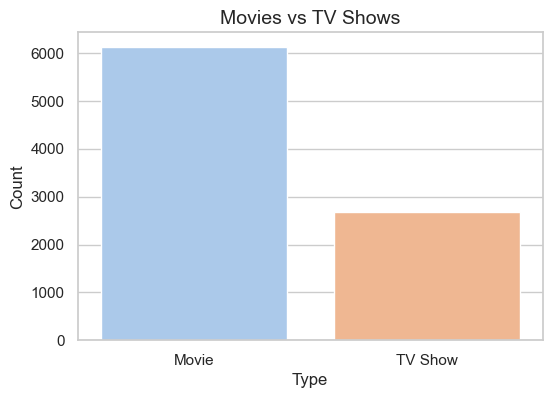

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='pastel')
plt.title("Movies vs TV Shows", fontsize=14)
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


## 📅 Content Added Over Years
Tracking how Netflix's library has grown annually.


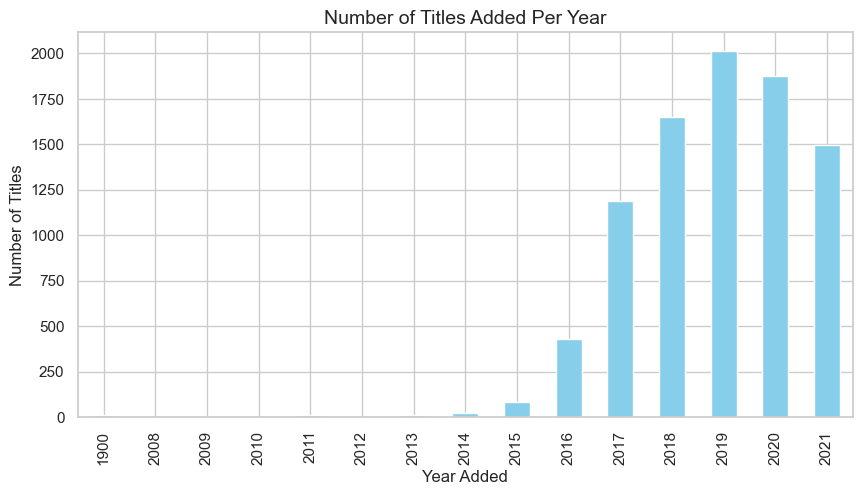

In [5]:
plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Number of Titles Added Per Year", fontsize=14)
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


## 🎭 Top 10 Genres
Which genres dominate Netflix's catalog?


C:\Users\vrush\AppData\Local\Temp\ipykernel_28644\4136747948.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


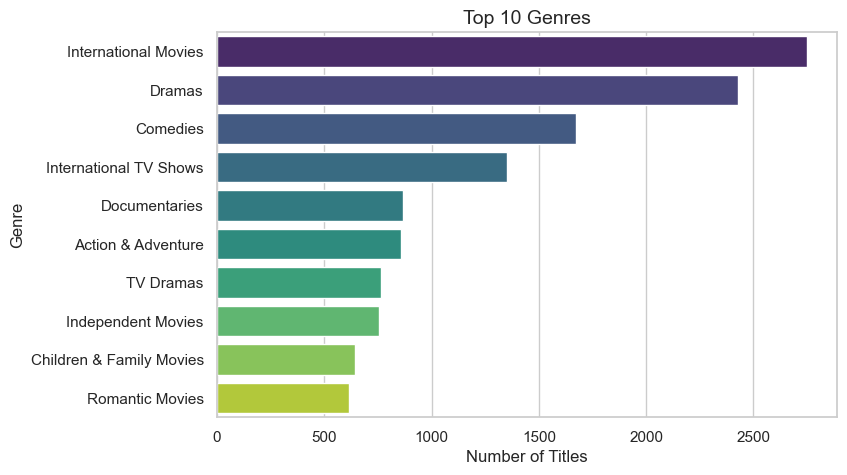

In [6]:
from collections import Counter

all_genres = df['listed_in'].str.split(',').sum()
genre_counts = pd.Series(Counter([g.strip() for g in all_genres]))
top_genres = genre_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title("Top 10 Genres", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


## ⏳ Duration Analysis
Exploring patterns in duration for both Movies and TV Shows.


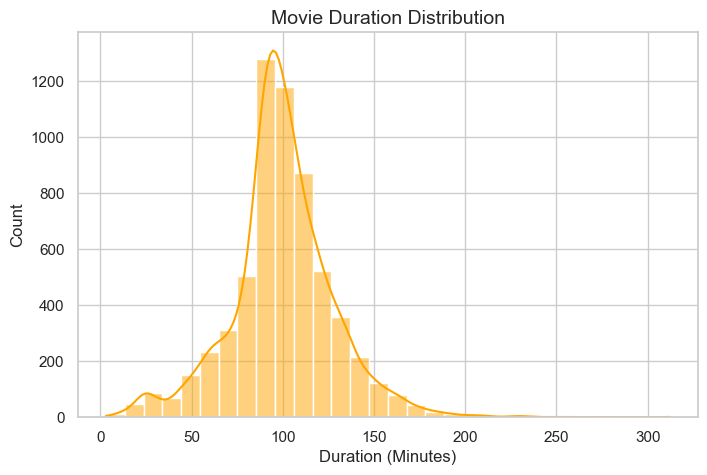

C:\Users\vrush\AppData\Local\Temp\ipykernel_28644\3446508506.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['is_movie']==0], x='duration_value', palette='coolwarm')


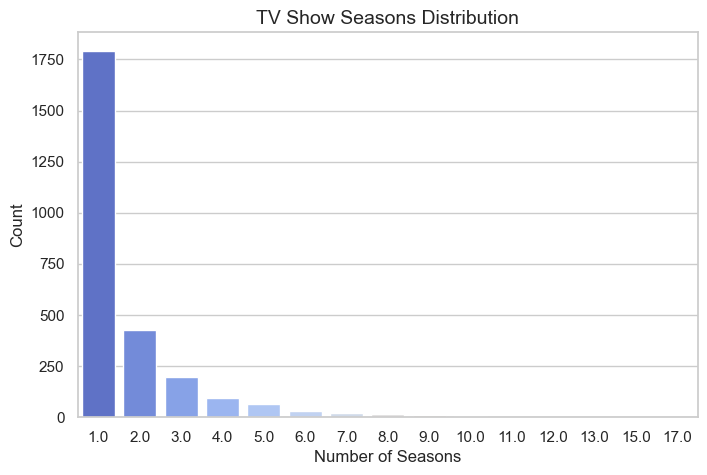

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(data=df[df['is_movie']==1], x='duration_value', bins=30, kde=True, color='orange')
plt.title("Movie Duration Distribution", fontsize=14)
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df[df['is_movie']==0], x='duration_value', palette='coolwarm')
plt.title("TV Show Seasons Distribution", fontsize=14)
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()


## ⌛ Content Age
How long after release does content get added to Netflix?


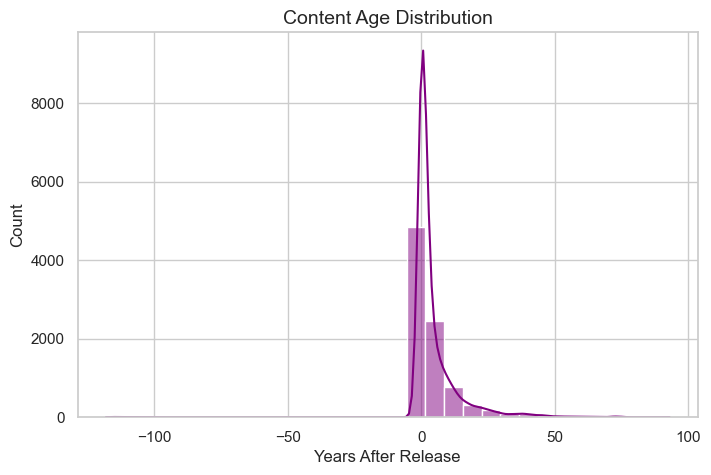

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['content_age'], bins=30, kde=True, color='purple')
plt.title("Content Age Distribution", fontsize=14)
plt.xlabel("Years After Release")
plt.ylabel("Count")
plt.show()


In [11]:
df.to_csv("data_eda.csv", index=False)
print("✅ EDA-ready dataset saved as netflix_eda_ready.csv")


✅ EDA-ready dataset saved as netflix_eda_ready.csv


C:\Users\vrush\AppData\Local\Temp\ipykernel_28644\3724206960.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette="viridis")


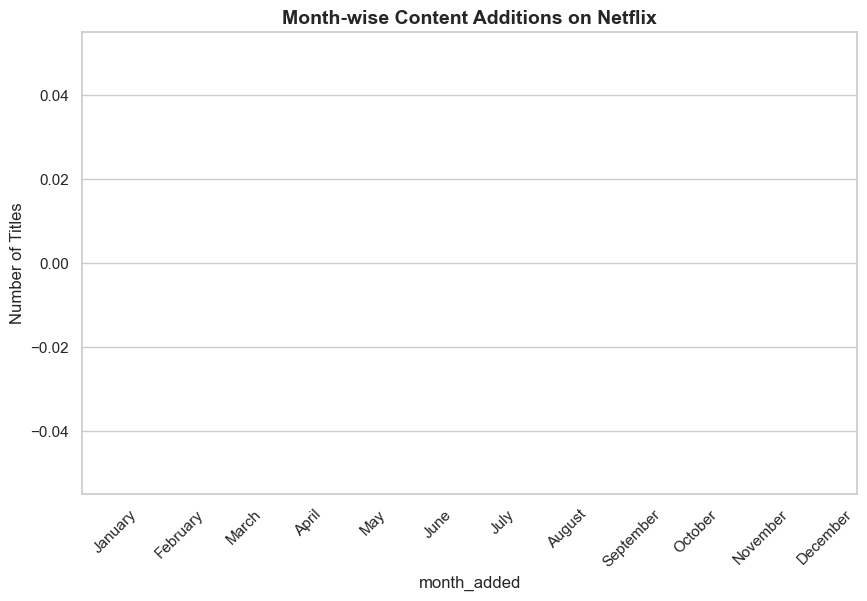

In [13]:
# Month-wise content addition trend
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

month_counts = df['month_added'].value_counts().reindex(month_order)

plt.figure(figsize=(10,6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette="viridis")
plt.title('Month-wise Content Additions on Netflix', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Number of Titles')
plt.show()


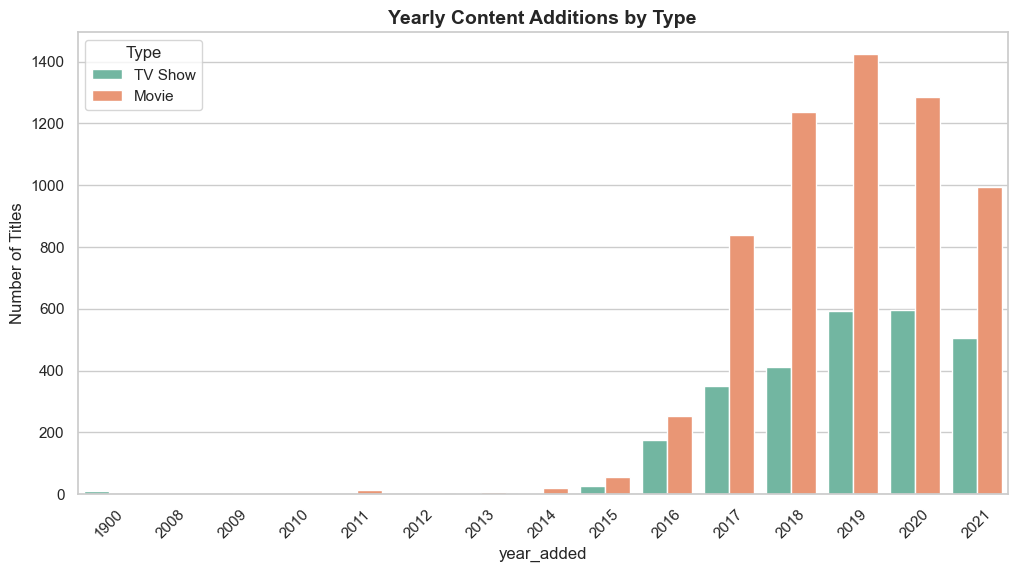

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year_added', hue='type', palette='Set2')
plt.title('Yearly Content Additions by Type', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.show()


C:\Users\vrush\AppData\Local\Temp\ipykernel_28644\1039873044.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_directors.index, x=top_directors.values, palette="coolwarm")


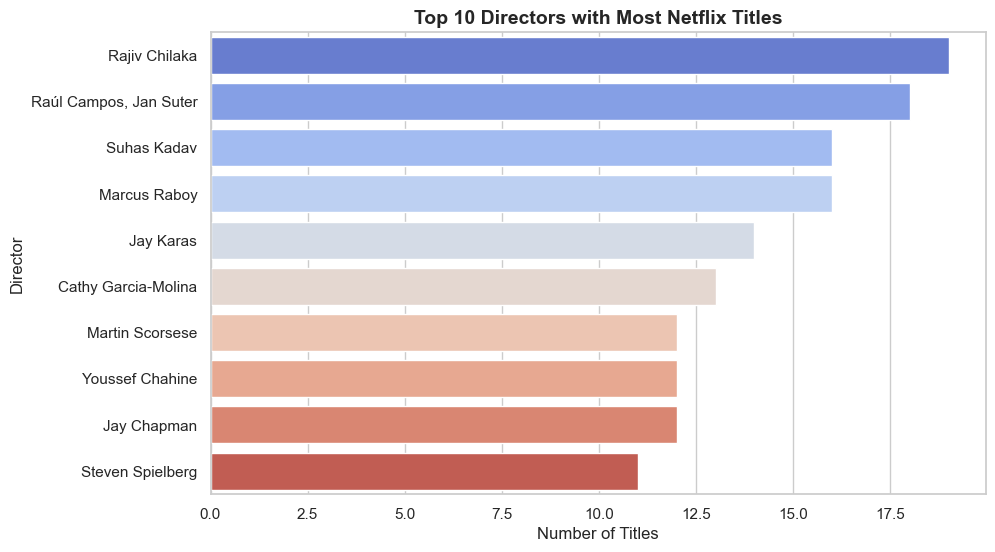

In [15]:
top_directors = df['director'].dropna().value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_directors.index, x=top_directors.values, palette="coolwarm")
plt.title('Top 10 Directors with Most Netflix Titles', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


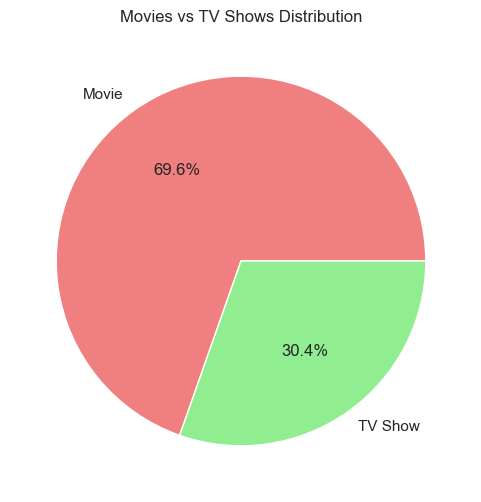

In [17]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(6,6))
type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral','lightgreen'])
plt.title('Movies vs TV Shows Distribution')
plt.ylabel('')
plt.show()


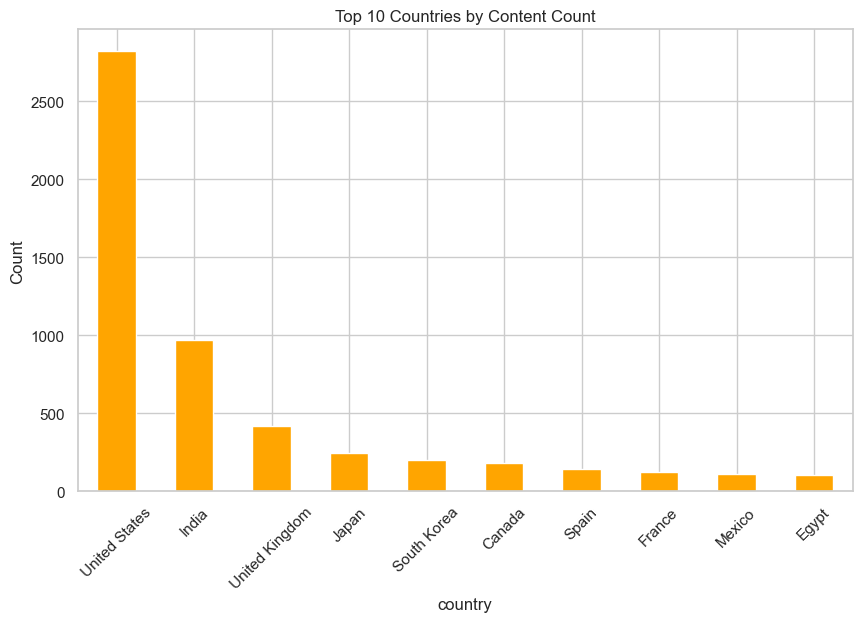

In [18]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
country_counts.plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Content Count')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


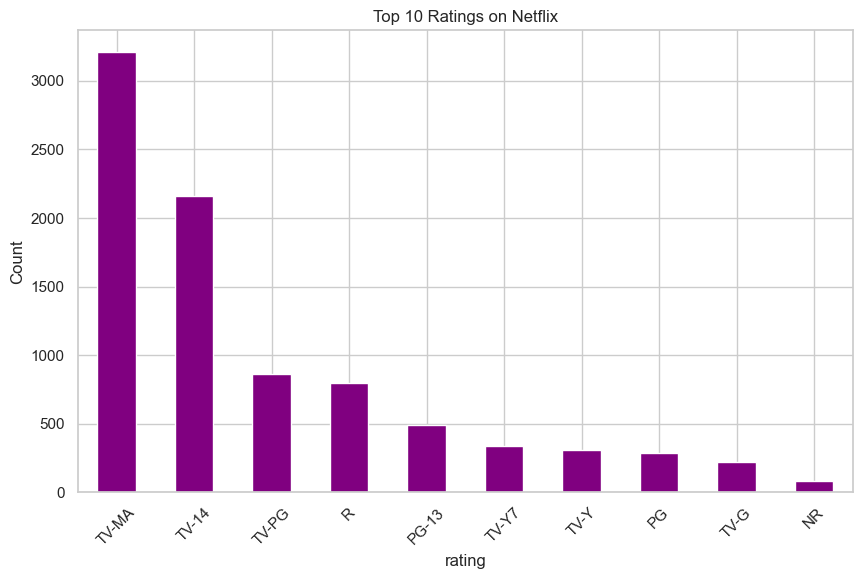

In [19]:
rating_counts = df['rating'].value_counts().head(10)
plt.figure(figsize=(10,6))
rating_counts.plot(kind='bar', color='purple')
plt.title('Top 10 Ratings on Netflix')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## 📊 Exploratory Data Analysis (EDA) Summary

In this analysis, we explored the Netflix dataset to understand its structure, clean missing values, and uncover key patterns.  
Our EDA covered **both univariate and bivariate analysis**, supported by visualizations for better insights.

### ✅ Key Steps Performed
- **Data Cleaning**
  - Handled missing values (`director`, `cast`, `country`, `date_added`, `rating`)
  - Standardized text formats and removed duplicates
  - Converted `date_added` to `datetime` and extracted `year_added`, `month_added`
  - Created `duration_int` and `duration_unit` from the `duration` column

- **Dataset Overview**
  - Checked number of rows, columns, and datatypes
  - Reviewed percentage of missing values
  - Examined sample records to understand structure

- **Content Type Analysis**
  - Distribution of Movies vs TV Shows
  - Pie chart showing majority content type
  - Movies dominate Netflix's catalog, but TV Shows have been growing in recent years

- **Ratings Analysis**
  - Top 10 most frequent ratings (e.g., TV-MA, TV-14, R)
  - Ratings distribution shows Netflix caters mainly to mature audiences

- **Genre Analysis**
  - Extracted individual genres from `listed_in`
  - Bar chart of Top 10 genres (e.g., International Movies, Dramas, Comedies)
  - Shows diversity of content with focus on global audience

- **Country-wise Content**
  - Bar chart of Top 10 countries producing Netflix content
  - USA leads by a large margin, followed by India, UK, and others

- **Release Year Trends**
  - Line plot showing number of releases per year
  - Strong upward trend in releases post-2015, peaking around 2019–2020

- **Monthly Addition Trends**
  - Analyzed `date_added` for seasonal patterns in new releases

---



## 📌 Insights & Conclusion

- **Movies dominate** Netflix's library, but **TV Shows form a significant portion**.
- **Mature ratings (TV-MA, TV-14)** make up the bulk of the catalog.
- **International Movies** and **Dramas** are the most common genres, reflecting Netflix's global strategy.
- **USA is the leading producer** of Netflix content, with India and the UK following closely.
- **Content production grew sharply after 2015**, with a peak in 2019–2020 before stabilizing.
- **Monthly trends** indicate no extreme seasonal bias, but certain months see slight spikes in additions.


## 💡 Recommendations

- **Leverage growing TV Show interest** by investing more in high-quality, multi-season shows to increase subscriber retention.
- **Expand regional content** — especially in countries like India, UK, and South Korea — to capture emerging markets.
- **Balance mature ratings** with family-friendly content to broaden audience reach.
- **Promote top genres** like Dramas and International Movies through targeted marketing campaigns.
- **Capitalize on seasonal peaks** by scheduling blockbuster releases during high-addition months.


## 🔮 Future Scope

- Conduct **sentiment analysis** on content descriptions to understand audience tone preferences.
- Integrate **viewership data** (if available) to link popularity with ratings, genres, and countries.
- Explore **recommendation system models** using collaborative filtering or content-based approaches.
- Perform **time-series forecasting** to predict content additions in upcoming months.
